# Wheat seeds (2626868.pdf)

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier as RC, LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Importing Dataset

In [3]:
names = ('area A',
'perimeter P',
'compactness',
'length of kernel',
'width of kernel',
'asymmetry coefficient',
'length of kernel groove',
'class1')

In [4]:
df = pd.read_csv('wheat-seeds.csv', names = names)

Exploratory Data Analysis

In [5]:
df.head()

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
df.isnull().sum()

area A                     0
perimeter P                0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class1                     0
dtype: int64

In [7]:
df.describe()

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class1
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<AxesSubplot:>

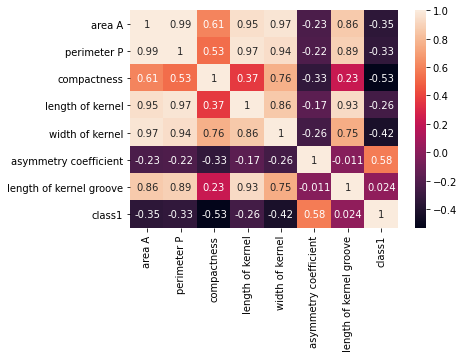

In [8]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Compactness and Class')

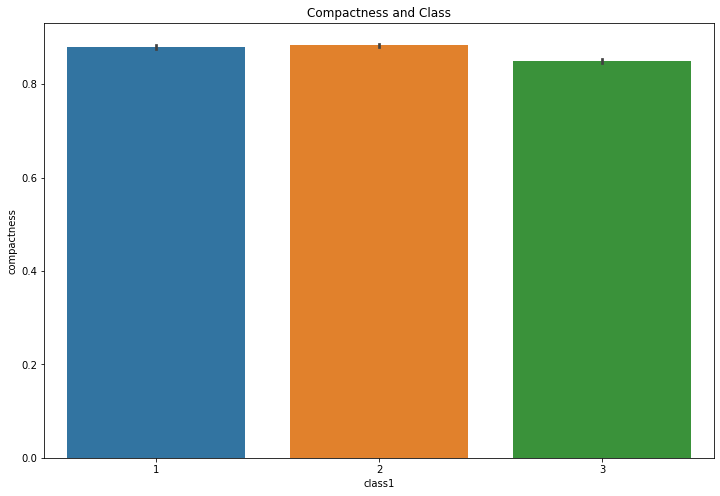

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'class1', y = 'compactness', data = df)
plt.title('Compactness and Class')

Classification

In [10]:
y = df.class1
x = df.drop('class1', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 176)

In [11]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(157, 7) (53, 7) (157,) (53,)


In [12]:
models = {'Ridge' : make_pipeline(StandardScaler(), RC(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RFC(random_state=123)),
    'LogisticRegression' : make_pipeline(StandardScaler(), LR(random_state=123)),
    'DecisionTreeClassifier' : make_pipeline(StandardScaler(), DTC(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GBC(random_state=123))}


In [13]:
models

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [14]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

Ridge
RandomForest
LogisticRegression
DecisionTreeClassifier
GradientBoosting


In [15]:
models_fit

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [16]:
res1 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = accuracy_score(ytest, ypred)
    res1 = np.append(res1, r1)
    output = "%s|Accuracy = %f" %(name, r1)
    print(output)


Ridge|Accuracy = 0.962264
RandomForest|Accuracy = 0.943396
LogisticRegression|Accuracy = 0.924528
DecisionTreeClassifier|Accuracy = 0.943396
GradientBoosting|Accuracy = 0.943396


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

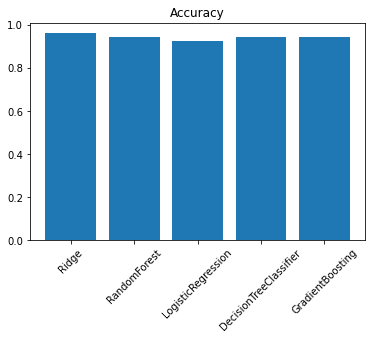

In [17]:
plt.bar(names, res1)
plt.title('Accuracy')
plt.xticks(rotation = 45)

array([0.96226415, 0.94339623, 0.9245283 , 0.94339623, 0.94339623])

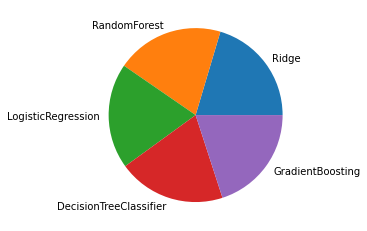

In [18]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [19]:
model = make_pipeline(StandardScaler(), RC(alpha=1.0, fit_intercept=True, normalize='deprecated',
                                        copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto',
                                        random_state=None))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')

0.8679245283018868


More Model(s) With Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [ ]:
RC_hyperparameters = {
    'alpha' : [0, 0.25, 0.5, 0.75, 1],
    'normalize' : [True, False], 
    'max_iter' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [ ]:
model1 = RC()
model1 = RS(model1, RC_hyperparameters, n_iter=50)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{accuracy_score(ytest, ypred1)}')

In [ ]:
model1.best_params_
print(model1.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV as GS

model2 = RC()
model2 = GS(model2, RC_hyperparameters)
model2.fit(xtrain, ytrain)
model2.best_params_
ypred2 = model2.predict(xtest)
print(f'{accuracy_score(ytest, ypred2)}')

In [ ]:
model2.best_params_
print(model2.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
model3 = KN(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)
model3.fit(xtrain, ytrain)
ypred = model3.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')


In [ ]:
KN_hyperparameters = {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['uniform', 'distance'], 
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [ ]:
model4 = KN()
model4 = RS(model4, KN_hyperparameters, n_iter=50)
model4.fit(xtrain, ytrain)
model4.best_params_
ypred4 = model4.predict(xtest)
print(f'{accuracy_score(ytest, ypred4)}')

In [ ]:
model4.best_params_
print(model4.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV as GS

model5 = KN()
model5 = GS(model5, KN_hyperparameters)
model5.fit(xtrain, ytrain)
model5.best_params_
ypred5 = model5.predict(xtest)
print(f'{accuracy_score(ytest, ypred5)}')

In [ ]:
model5.best_params_
print(model5.best_params_)

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [23]:
# calculate precision and recall for each threshold
lr_precision, lr_recall, _= precision_recall_curve(ytest, ypred, pos_label = 1)
# calculate scores
lr_f1, lr_auc = f1_score(ytest, ypred), auc(lr_recall, lr_precision)
# summarize scores
print('KN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, marker='.', label='KN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].